In [174]:
# import required libraries
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

In [175]:
#installing category encoder
# !pip install category_encoders


In [176]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [177]:

# from category_encoders import TargetEncoder

In [178]:
# load the data into environment
train = pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/train_data.csv")
assembly_data = pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/assembly_line_info.csv")
car_var= pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/car_variant_data.csv")
issue = pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/issue_info.csv")
log = pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/log_report_type_data.csv")
test = pd.read_csv("/content/gdrive/MyDrive/Datasets_factory/test_data.csv")

In [179]:
# Checking records and columns
print(train.shape)
print(assembly_data.shape)
print(car_var.shape)
print(issue.shape)
print(log.shape)
print(test.shape)

(5904, 3)
(21076, 2)
(31170, 2)
(18552, 2)
(58671, 3)
(1477, 2)


# Exploratory Data Analysis

In [180]:
# checking data types in each file
print(train.dtypes)
print(assembly_data.dtypes)
print(car_var.dtypes)
print(issue.dtypes)
print(log.dtypes)
print(test.dtypes)

id                    int64
factory_number       object
downtime_duration     int64
dtype: object
id                     int64
assembly_line_type    object
dtype: object
id              int64
car_variant    object
dtype: object
id             int64
issue_type    object
dtype: object
id                  int64
log_report_type    object
volume              int64
dtype: object
id                 int64
factory_number    object
dtype: object


In [181]:
# printing column names
print(train.columns)
print(assembly_data.columns)
print(car_var.columns)
print(issue.columns)
print(log.columns)

Index(['id', 'factory_number', 'downtime_duration'], dtype='object')
Index(['id', 'assembly_line_type'], dtype='object')
Index(['id', 'car_variant'], dtype='object')
Index(['id', 'issue_type'], dtype='object')
Index(['id', 'log_report_type', 'volume'], dtype='object')


In [182]:
# checking first few records for each file
print(train.head())
print(assembly_data.head())
print(car_var.head())
print(issue.head())
print(log.head())

      id      factory_number  downtime_duration
0  13366  factory_number_415                  1
1   6783  factory_number_474                  0
2   9519  factory_number_931                  1
3  10202  factory_number_700                  1
4   4555  factory_number_600                  2
     id    assembly_line_type
0  6597  assembly_line_type_8
1  8011  assembly_line_type_8
2  2597  assembly_line_type_8
3  5022  assembly_line_type_8
4  6852  assembly_line_type_8
     id     car_variant
0  6597  car_variant_11
1  8011  car_variant_15
2  2597  car_variant_15
3  5022  car_variant_15
4  5022  car_variant_11
     id    issue_type
0  6597  issue_type_2
1  8011  issue_type_2
2  2597  issue_type_2
3  5022  issue_type_1
4  6852  issue_type_1
     id      log_report_type  volume
0  6597   log_report_type_68       6
1  8011   log_report_type_68       7
2  2597   log_report_type_68       1
3  5022  log_report_type_172       2
4  5022   log_report_type_56       1


In [183]:
# checking for unique levels in each file
print(train.nunique())
print(assembly_data.nunique())
print(car_var.nunique())
print(issue.nunique())
print(log.nunique())

id                   5904
factory_number        876
downtime_duration       3
dtype: int64
id                    18552
assembly_line_type       10
dtype: int64
id             18552
car_variant       53
dtype: int64
id            18552
issue_type        5
dtype: int64
id                 18552
log_report_type      386
volume               341
dtype: int64


In [184]:
# Distribution of dependent variable
train.downtime_duration.value_counts(normalize=True)*100

0    64.820461
1    25.338753
2     9.840786
Name: downtime_duration, dtype: float64

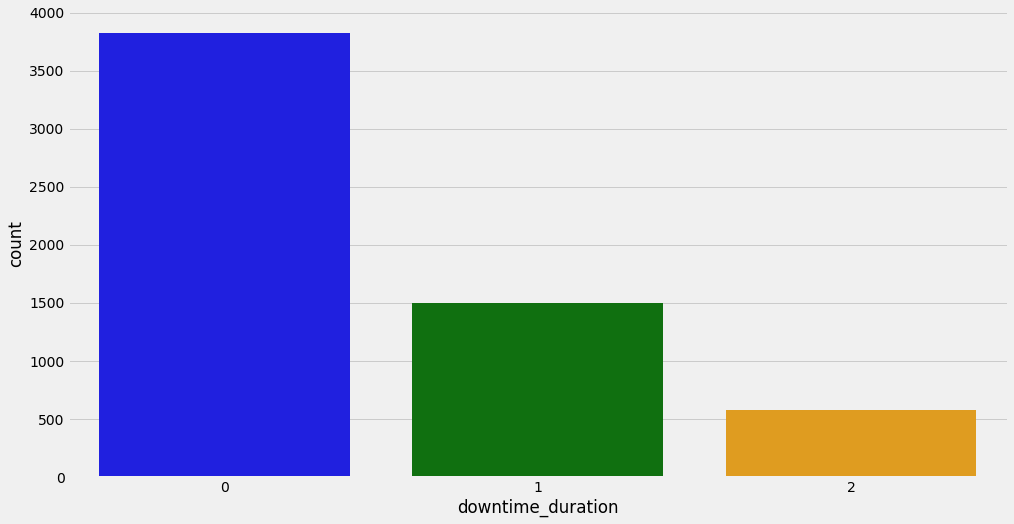

In [185]:
sns.countplot('downtime_duration',data=train,palette=['blue','green','orange'])

In [186]:
# merging the datasets into a consolidated dataframe
merged = pd.merge(assembly_data, car_var, how='inner', on=['id'])
merged1 = pd.merge(merged, issue, how='inner', on=['id'])
merged2 = pd.merge(merged1, log, how='inner', on=['id'])
merged_final = pd.merge(train, merged2, how='inner', on=['id'])
train = merged_final


In [187]:
train.to_csv("/content/gdrive/MyDrive/Datasets_factory/merged_data_factory.csv")

In [188]:
train.shape

(48973, 8)

In [189]:
train.head()

,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,1
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_312,2
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_233,1
3,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_232,1
4,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_315,2


In [190]:
# checking for dupicated records
duplicate_rows = train.duplicated()
train[duplicate_rows]

,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume


It seems there are no duplicate reocrds

Which factories are most prone to long downtime durations?

In [191]:
train.factory_number.value_counts()

factory_number_794    1285
factory_number_821     932
factory_number_126     868
factory_number_734     812
factory_number_802     721
                      ... 
factory_number_110       1
factory_number_511       1
factory_number_315       1
factory_number_26        1
factory_number_5         1
Name: factory_number, Length: 876, dtype: int64

In [192]:
train.groupby(['downtime_duration'])['factory_number'].count()

downtime_duration
0    29347
1    12812
2     6814
Name: factory_number, dtype: int64

In [193]:
factory_count = train[train.downtime_duration == 2]
factory_count.shape

(6814, 8)

In [194]:
factory_count.factory_number.nunique()

135

These are factories with long downtimes. So, lets us analyse the assembly line types that are suspect of long downtime durations since there can be many assembly line types in a single factory

In [195]:
train.assembly_line_type.nunique()

10

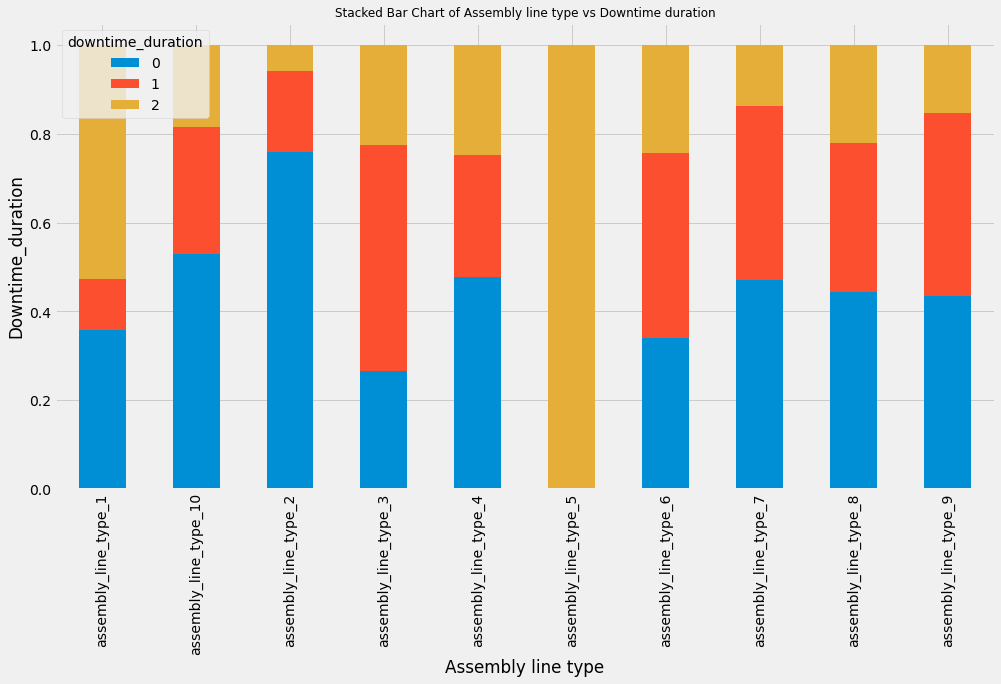

In [196]:
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(train.assembly_line_type, train.downtime_duration)
table.div(table.sum(1).astype(int), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Assembly line type vs Downtime duration', fontsize=12)
plt.xlabel('Assembly line type')
plt.ylabel('Downtime_duration')
plt.show()

# **Observations:**
1. From the above, it is clearly evident that assembly_line_type_5 and assembly_line_type1 has long downtime. So, we need to investigate the type of issue and log report for this particular assembly type.
2. For these two particular assembly_line_types(5&1), we need to check the volume of cars that is being handled by these assembly lines as there are having high downtime

In [197]:
train.groupby(['assembly_line_type'])['volume'].count().sort_values(ascending=False)

assembly_line_type
assembly_line_type_2     25074
assembly_line_type_8     15981
assembly_line_type_7      2237
assembly_line_type_6      2038
assembly_line_type_4      1469
assembly_line_type_9       643
assembly_line_type_3       561
assembly_line_type_1       481
assembly_line_type_10      379
assembly_line_type_5       110
Name: volume, dtype: int64

# **observation:**
assembly_line_type_2&8 are handling more volume of cars. From the above graph we can see there is also mid to long downtimes for both of the assembly lines, so business must take immediate action to reduce the downtime of these 2 assembly lines first. And also for the factory to be running all the assembly lines must be functioning, others assembly lines needs to be investigated.

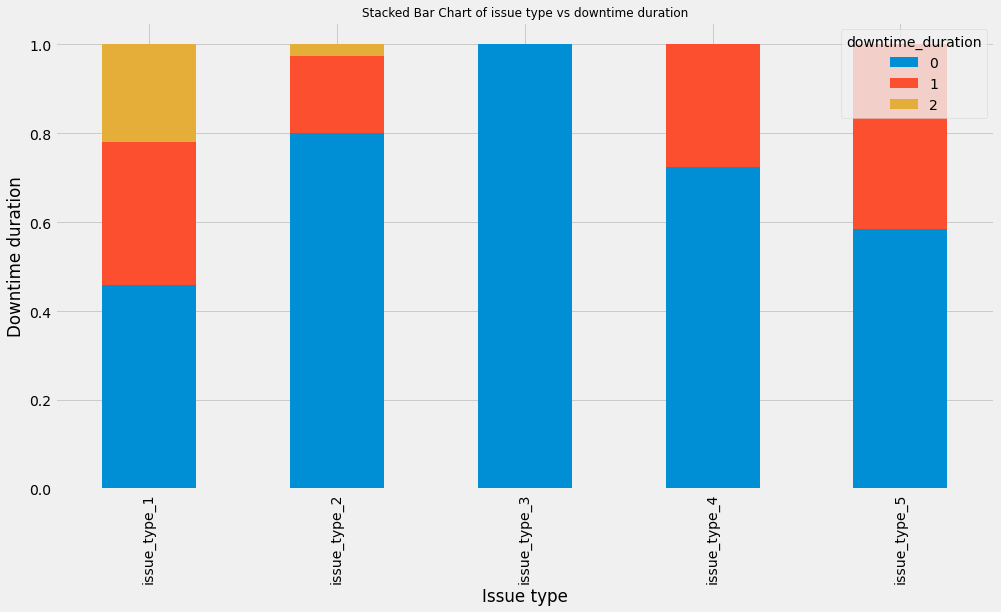

In [198]:
#lets us investigate on the column issue_type
plt.rcParams['figure.figsize'] = [15, 8]
ax= plt.style.use('fivethirtyeight')
table=pd.crosstab(train.issue_type, train.downtime_duration)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of issue type vs downtime duration', fontsize=12)
plt.xlabel('Issue type')
plt.ylabel('Downtime duration')
plt.show()

# **Observations:**
1. issue_type_3 has low downtime duration of 15mins to 1hr which is good.
2.issue_type_1 has long downtimeduration which lasts from 24hrs to several days which needs to be taken into consideration immediately.
3. As issue type refres to the issue reported by onsite engineer, business needs to consult him and take actions to solve it to better handle the downtimes.

In [199]:
# One hot encoding
cat_list = ['assembly_line_type','issue_type']
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(train[cat_list])
columns_ohe = list(ohe.get_feature_names(cat_list))
train_cat = ohe.transform(train[cat_list])
train_cat= pd.DataFrame(train_cat.todense(), columns=columns_ohe)

In [200]:
train_data = pd.concat([train,train_cat],axis=1)

In [201]:
train_data.shape

(48973, 23)

In [202]:
train_data.head()

,id,factory_number,downtime_duration,assembly_line_type,car_variant,issue_type,log_report_type,volume,assembly_line_type_assembly_line_type_1,assembly_line_type_assembly_line_type_10,...,assembly_line_type_assembly_line_type_5,assembly_line_type_assembly_line_type_6,assembly_line_type_assembly_line_type_7,assembly_line_type_assembly_line_type_8,assembly_line_type_assembly_line_type_9,issue_type_issue_type_1,issue_type_issue_type_2,issue_type_issue_type_3,issue_type_issue_type_4,issue_type_issue_type_5
0,13366,factory_number_415,1,assembly_line_type_2,car_variant_35,issue_type_4,log_report_type_312,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_312,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_233,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_232,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,6783,factory_number_474,0,assembly_line_type_2,car_variant_35,issue_type_2,log_report_type_315,2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [203]:
!pip install category_encoders --upgrade
from category_encoders import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
from category_encoders import TargetEncoder

In [205]:
#Performing target encoding for the categorical attributes with very high number of levels
y = train_data['downtime_duration']
X = train_data.drop('downtime_duration', axis=1)

enc = TargetEncoder(cols=['car_variant', 'factory_number', 'log_report_type' ])

train_data = enc.fit_transform(X,y)

In [206]:
train_data.sample(10)

,id,factory_number,assembly_line_type,car_variant,issue_type,log_report_type,volume,assembly_line_type_assembly_line_type_1,assembly_line_type_assembly_line_type_10,assembly_line_type_assembly_line_type_2,...,assembly_line_type_assembly_line_type_5,assembly_line_type_assembly_line_type_6,assembly_line_type_assembly_line_type_7,assembly_line_type_assembly_line_type_8,assembly_line_type_assembly_line_type_9,issue_type_issue_type_1,issue_type_issue_type_2,issue_type_issue_type_3,issue_type_issue_type_4,issue_type_issue_type_5
22696,149,0.000000e+00,assembly_line_type_2,0.150833,issue_type_2,0.277851,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36954,6487,7.236842e-01,assembly_line_type_6,0.602740,issue_type_1,0.838221,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
47319,15786,7.497984e-12,assembly_line_type_2,0.133333,issue_type_3,0.003613,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3610,1184,1.578947e-01,assembly_line_type_8,0.759579,issue_type_1,0.590179,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
23452,16667,2.500000e-01,assembly_line_type_2,0.154569,issue_type_2,0.049285,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44384,11815,0.000000e+00,assembly_line_type_2,0.150833,issue_type_2,0.048780,23,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14496,1572,3.396226e-01,assembly_line_type_2,0.150833,issue_type_2,0.163786,2,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19009,13166,4.255319e-02,assembly_line_type_8,0.718315,issue_type_1,0.115830,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
20649,12984,7.236842e-01,assembly_line_type_8,0.902981,issue_type_1,0.838221,1,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1825,345,1.467700e+00,assembly_line_type_2,0.777920,issue_type_1,0.706161,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [207]:
# converting into appropriate data types
train['downtime_duration'] = train['downtime_duration'].astype('category')
train_data['factory_number'] = train_data['factory_number'].astype('category')
train_data['assembly_line_type'] = train_data['assembly_line_type'].astype('category')
train_data['car_variant'] = train_data['car_variant'].astype('category')
train_data['issue_type'] = train_data['issue_type'].astype('category')
train_data['log_report_type'] = train_data['log_report_type'].astype('category')

In [208]:
train_data.drop(['id','assembly_line_type','issue_type'], axis=1, inplace=True)

In [209]:
train_data.isnull().sum()

factory_number                              0
car_variant                                 0
log_report_type                             0
volume                                      0
assembly_line_type_assembly_line_type_1     0
assembly_line_type_assembly_line_type_10    0
assembly_line_type_assembly_line_type_2     0
assembly_line_type_assembly_line_type_3     0
assembly_line_type_assembly_line_type_4     0
assembly_line_type_assembly_line_type_5     0
assembly_line_type_assembly_line_type_6     0
assembly_line_type_assembly_line_type_7     0
assembly_line_type_assembly_line_type_8     0
assembly_line_type_assembly_line_type_9     0
issue_type_issue_type_1                     0
issue_type_issue_type_2                     0
issue_type_issue_type_3                     0
issue_type_issue_type_4                     0
issue_type_issue_type_5                     0
dtype: int64

In [210]:
train_data.head()

,factory_number,car_variant,log_report_type,volume,assembly_line_type_assembly_line_type_1,assembly_line_type_assembly_line_type_10,assembly_line_type_assembly_line_type_2,assembly_line_type_assembly_line_type_3,assembly_line_type_assembly_line_type_4,assembly_line_type_assembly_line_type_5,assembly_line_type_assembly_line_type_6,assembly_line_type_assembly_line_type_7,assembly_line_type_assembly_line_type_8,assembly_line_type_assembly_line_type_9,issue_type_issue_type_1,issue_type_issue_type_2,issue_type_issue_type_3,issue_type_issue_type_4,issue_type_issue_type_5
0,0.69697,0.150833,0.163786,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.00000,0.150833,0.163786,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.00000,0.150833,0.106208,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.00000,0.150833,0.171648,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.00000,0.150833,0.055833,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [211]:
X1 = train_data.loc[:,:]
y1 = train['downtime_duration']

In [212]:
# Splitting the data into train and test


X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=123, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(39178, 19)
(9795, 19)
(39178,)
(9795,)


In [213]:
# checking for missing values
print(X_train.isnull().sum())
print(y_train.isnull().sum())
print(X_test.isnull().sum())
print(X_test.isnull().sum())

factory_number                              0
car_variant                                 0
log_report_type                             0
volume                                      0
assembly_line_type_assembly_line_type_1     0
assembly_line_type_assembly_line_type_10    0
assembly_line_type_assembly_line_type_2     0
assembly_line_type_assembly_line_type_3     0
assembly_line_type_assembly_line_type_4     0
assembly_line_type_assembly_line_type_5     0
assembly_line_type_assembly_line_type_6     0
assembly_line_type_assembly_line_type_7     0
assembly_line_type_assembly_line_type_8     0
assembly_line_type_assembly_line_type_9     0
issue_type_issue_type_1                     0
issue_type_issue_type_2                     0
issue_type_issue_type_3                     0
issue_type_issue_type_4                     0
issue_type_issue_type_5                     0
dtype: int64
0
factory_number                              0
car_variant                                 0
log_report_type    

In [214]:
# Function to calculate accuracy, recall, precision and F1 score
scores = pd.DataFrame(columns=['Model', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1_Score', 
                               'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1_Score'])

def get_metrics(train_actual, train_predicted, test_actual, test_predicted, model_description, dataframe):

    train_accuracy  = accuracy_score(train_actual, train_predicted)
    train_recall    = recall_score(train_actual, train_predicted, average="weighted")
    train_precision = precision_score(train_actual, train_predicted, average="weighted")
    train_f1score   = f1_score(train_actual, train_predicted, average="weighted")
    
    test_accuracy   = accuracy_score(test_actual, test_predicted)
    test_recall     = recall_score(test_actual, test_predicted, average="weighted")
    test_precision  = precision_score(test_actual, test_predicted, average="weighted")
    test_f1score    = f1_score(test_actual, test_predicted, average="weighted")

    dataframe       = dataframe.append(pd.Series([model_description, 
                                                  train_accuracy, train_recall, train_precision, train_f1score,
                                                  test_accuracy, test_recall, test_precision, test_f1score],
                                                 index=scores.columns ), 
                                       ignore_index=True)

    return(dataframe)

In [215]:
# Decision Tree
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
y_pred_train = clf_dt.predict(X_train)
y_pred_test =  clf_dt.predict(X_test)

In [216]:
# classification report
def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            
               CLASSIFICATION REPORT FOR TRAIN DATA
            
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            
               CLASSIFICATION REPORT FOR TEST DATA
            
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [217]:
classifcation_report_train_test(y_train, y_pred_train, y_test, y_pred_test)


            
               CLASSIFICATION REPORT FOR TRAIN DATA
            
            
              precision    recall  f1-score   support

           0     0.9371    0.9879    0.9618     23477
           1     0.9391    0.8785    0.9078     10250
           2     0.9781    0.8685    0.9200      5451

    accuracy                         0.9427     39178
   macro avg     0.9514    0.9116    0.9299     39178
weighted avg     0.9433    0.9427    0.9419     39178


            
               CLASSIFICATION REPORT FOR TEST DATA
            
            
              precision    recall  f1-score   support

           0     0.8837    0.9101    0.8967      5870
           1     0.7715    0.7525    0.7619      2562
           2     0.8297    0.7616    0.7942      1363

    accuracy                         0.8482      9795
   macro avg     0.8283    0.8080    0.8176      9795
weighted avg     0.8468    0.8482    0.8472      9795



In [218]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "DecisionTrees", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.942672,0.942672,0.943344,0.94189,0.848188,0.848188,0.846849,0.847168


# **Observation**
The model performed well on the training set and no so well on the test data. Let us apply bagging techniques to reduce overfit.

In [219]:
# Random Forest
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
y_pred_train = clf_rf.predict(X_train)
y_pred_test =  clf_rf.predict(X_test)
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "RandomForest", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.942672,0.942672,0.943344,0.941890,0.848188,0.848188,0.846849,0.847168
1,RandomForest,0.942672,0.942672,0.942591,0.942617,0.814395,0.814395,0.813712,0.814035


# **Observation:**
However bagging techinque doest help much to reduce overfit. There might be data lekage due to target encoding

In [220]:
# Adaboost
clf_adaboost =  AdaBoostClassifier()
clf_adaboost.fit(X_train, y_train)
y_pred_train = clf_adaboost.predict(X_train)
y_pred_test =  clf_adaboost.predict(X_test)

In [222]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "Adaboost", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.942672,0.942672,0.943344,0.941890,0.848188,0.848188,0.846849,0.847168
1,RandomForest,0.942672,0.942672,0.942591,0.942617,0.814395,0.814395,0.813712,0.814035
2,Adaboost,0.768850,0.768850,0.780461,0.773105,0.764676,0.764676,0.775712,0.768821


In [223]:
# Gradient boosting
clf_gbm = GradientBoostingClassifier()
clf_gbm.fit(X=X_train, y=y_train)
y_pred_train = clf_gbm.predict(X_train)
y_pred_test = clf_gbm.predict(X_test)

In [224]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "GBM", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.942672,0.942672,0.943344,0.941890,0.848188,0.848188,0.846849,0.847168
1,RandomForest,0.942672,0.942672,0.942591,0.942617,0.814395,0.814395,0.813712,0.814035
2,Adaboost,0.768850,0.768850,0.780461,0.773105,0.764676,0.764676,0.775712,0.768821
3,GBM,0.794885,0.794885,0.799051,0.796511,0.792547,0.792547,0.796503,0.794135


Adaboost and Gradient boosting algorithms performed well on both train and test data. So let us stack them and check

In [228]:
#stacking
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('clf_adaboost', clf_adaboost), ('clf_gbm', clf_gbm)])
voting_clf.fit(X_train, y_train) 
y_pred_train = voting_clf.predict(X_train)
y_pred_test = voting_clf.predict(X_test)

In [229]:
scores = get_metrics(y_train, y_pred_train, y_test, y_pred_test, "Stacking", scores)
scores

,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTrees,0.942672,0.942672,0.943344,0.941890,0.848188,0.848188,0.846849,0.847168
1,RandomForest,0.942672,0.942672,0.942591,0.942617,0.814395,0.814395,0.813712,0.814035
2,Adaboost,0.768850,0.768850,0.780461,0.773105,0.764676,0.764676,0.775712,0.768821
3,GBM,0.794885,0.794885,0.799051,0.796511,0.792547,0.792547,0.796503,0.794135
4,Stacking,0.784420,0.784420,0.784856,0.784633,0.779479,0.779479,0.780083,0.779759
